1. Добиться вразумительного результата от модели, собранной на занятии (3 угаданные картинки из 4 предложенных на семинаре). Варианты изменений:  
a. изменение слоёв и их количества;  
b. изменение метода оптимизации;     
d. для продвинутых: преобразование данных.

In [2]:
# import sys
# !{sys.executable} -m pip install torch torchvision

     |████████████████████████████████| 108.0MB 92kB/s  eta 0:00:01    |███████████████████▊            | 66.5MB 3.3MB/s eta 0:00:13     |████████████████████▋           | 69.4MB 3.0MB/s eta 0:00:13     |███████████████████████▊        | 80.0MB 2.7MB/s eta 0:00:11     |██████████████████████████████  | 101.6MB 481kB/s eta 0:00:14
     |████████████████████████████████| 1.0MB 4.0MB/s eta 0:00:01


In [4]:
import torch
import torchvision
import numpy as np

In [16]:
from torch import nn 
from torch import optim
from torch.nn import functional as F

In [6]:
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [8]:
train_dataset = torchvision.datasets.CIFAR10(root='./data/',
                                             train=True,  
                                             transform=transforms.ToTensor(), 
                                             download=False)

Extracting ./data/cifar-10-python.tar.gz to ./data/


In [9]:
image, label = train_dataset[0]
print (image.size())
print (label)

torch.Size([3, 32, 32])
6


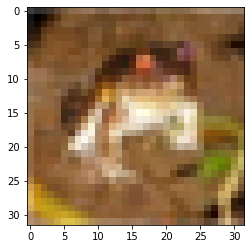

In [10]:
plt.imshow(image.permute(1, 2, 0).numpy())

In [11]:
test_dataset = torchvision.datasets.CIFAR10(root='./data_test', train=False,
                                       download=False, transform=transforms.ToTensor())

Extracting ./data_test/cifar-10-python.tar.gz to ./data_test


In [12]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=64, 
                                           shuffle=True)

In [13]:
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=4,
                                         shuffle=False)

In [14]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [17]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [18]:
net = Net().to('cpu')

In [19]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
PATH = './cifar_net_version_test_intro.pth'

In [ ]:
net = Net()
net.load_state_dict(torch.load(PATH))

* изменение процесса обучения;

In [20]:
for epoch in range(20):  
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0], data[1]

        # обнуляем градиент
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # выводим статистику о процессе обучения
        running_loss += loss.item()
        if i % 300 == 0:    # печатаем каждые 300 mini-batches
            print('[%d, %5d] loss: %.3f' %(epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Training is finished!')

[1,     1] loss: 0.001
[1,   301] loss: 0.346
[1,   601] loss: 0.345
[2,     1] loss: 0.001
[2,   301] loss: 0.345
[2,   601] loss: 0.344
[3,     1] loss: 0.001
[3,   301] loss: 0.336
[3,   601] loss: 0.326
[4,     1] loss: 0.001
[4,   301] loss: 0.304
[4,   601] loss: 0.297
[5,     1] loss: 0.001
[5,   301] loss: 0.293
[5,   601] loss: 0.289
[6,     1] loss: 0.001
[6,   301] loss: 0.283
[6,   601] loss: 0.276
[7,     1] loss: 0.001
[7,   301] loss: 0.266
[7,   601] loss: 0.261
[8,     1] loss: 0.001
[8,   301] loss: 0.253
[8,   601] loss: 0.251
[9,     1] loss: 0.001
[9,   301] loss: 0.242
[9,   601] loss: 0.239
[10,     1] loss: 0.001
[10,   301] loss: 0.234
[10,   601] loss: 0.230
[11,     1] loss: 0.001
[11,   301] loss: 0.225
[11,   601] loss: 0.225
[12,     1] loss: 0.001
[12,   301] loss: 0.220
[12,   601] loss: 0.219
[13,     1] loss: 0.001
[13,   301] loss: 0.215
[13,   601] loss: 0.214
[14,     1] loss: 0.001
[14,   301] loss: 0.212
[14,   601] loss: 0.210
[15,     1] loss: 0

In [21]:
data_iter = iter(test_loader)
images, labels = data_iter.next()

GroundTruth:    cat  ship  ship plane


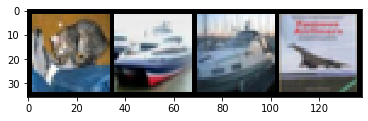

In [22]:
outputs = net(images)
imgs = torchvision.utils.make_grid(images)
plt.imshow(imgs.permute(1, 2, 0).numpy())
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [23]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat   car  ship plane


При увеличении количества эпох для обучения - точность ухудшается.

2. Взять часть, где мы делали один шаг обучения, и обернуть его в цикл по схеме, как обучали модель в конце занятия.

Переписать эту программу на PyTorch: 

Не забудьте про реализацию функции forward!